In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
import pymannkendall as mk

In [2]:
well_data = pd.read_excel('../data/Data-Wells.xlsx')
rm_nd = well_data.loc[well_data['1,4-Dioxane Results (ppb)'] != 'nd'].copy()
rm_capital_nd = rm_nd.loc[rm_nd['1,4-Dioxane Results (ppb)'] != 'ND'].copy()
rm_capital_nd['1,4-Dioxane Results (ppb)'] = rm_capital_nd['1,4-Dioxane Results (ppb)'].map(lambda x: x.replace(',', ''))
rm_capital_nd['1,4-Dioxane Results (ppb)'] = rm_capital_nd['1,4-Dioxane Results (ppb)'].map(lambda x: x.replace('<', ''))
res = rm_capital_nd
res.loc[:, 'ds']= pd.to_datetime(res['Date Sampled'])
res.loc[:, 'dioxane_results']= pd.to_numeric(res['1,4-Dioxane Results (ppb)'])
di_time = res.iloc[:, lambda df: df.columns.str.contains('Well Name|ds|dioxane_results',
                                              case=False)].copy()
di_time.rename(columns = {'dioxane_results':'y'}, inplace = True)
di_time.head(20)

,Well Name,ds,y
16,110 Parkland Plaza,1986-08-22,17.0
17,110 Parkland Plaza,1986-09-19,17.0
18,110 Parkland Plaza,1986-10-10,12.0
19,110 Parkland Plaza,1986-10-10,1.0
20,110 Parkland Plaza,1987-11-09,7.0
21,110 Parkland Plaza,1987-11-09,18.0
22,110 Parkland Plaza,1988-04-18,13.0
23,110 Parkland Plaza,1988-12-09,14.0
24,110 Parkland Plaza,1989-07-19,11.0
25,110 Parkland Plaza,1990-01-30,12.0


Model Number: 1 with model AverageValueNaive in generation 0 of 5
Model Number: 2 with model AverageValueNaive in generation 0 of 5
Model Number: 3 with model AverageValueNaive in generation 0 of 5
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 12') in model 3: AverageValueNaive
Model Number: 4 with model DatepartRegression in generation 0 of 5
Model Number: 5 with model DatepartRegression in generation 0 of 5
Model Number: 6 with model DatepartRegression in generation 0 of 5
Model Number: 7 with model DatepartRegression in generation 0 of 5
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 5
Model Number: 9 with model ETS in generation 0 of 5
Template Eval Error: ValueError('Unable to coerce to Series, length must be 1: given 12') in model 9: ETS
Model Number: 10 with model GLM in generation 0 of 5
Model Number: 11 with

/Users/zhangziliang/.virtualenvs/Gelman-Plume-Analysis/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/zhangziliang/.virtualenvs/Gelman-Plume-Analysis/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/Users/zhangziliang/.virtualenvs/Gelman-Plume-Analysis/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/zhangziliang/.virtualenvs/Gelman-Plume-Analysis/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/Users/zhangziliang/.virtualenvs/Gelman-Plume-Analysis/lib/pyt

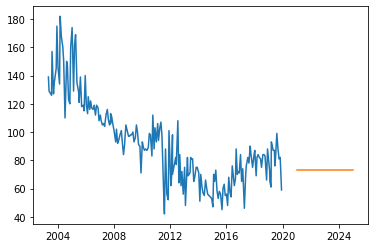

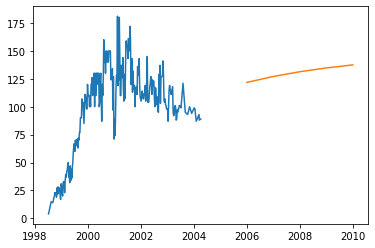

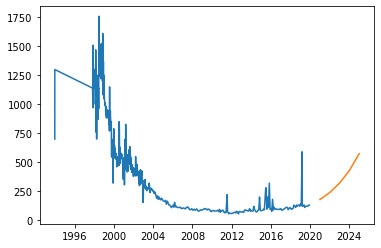

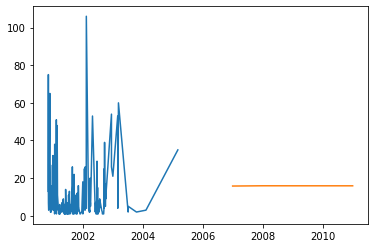

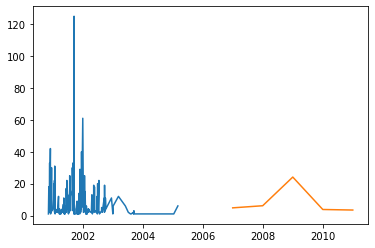

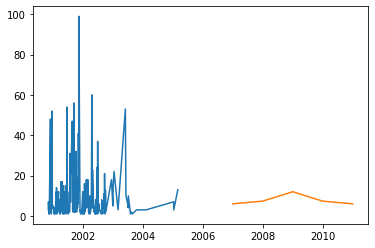

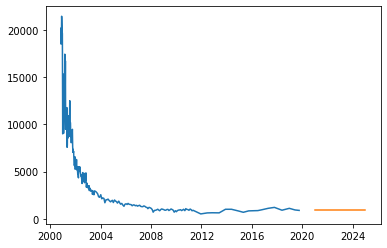

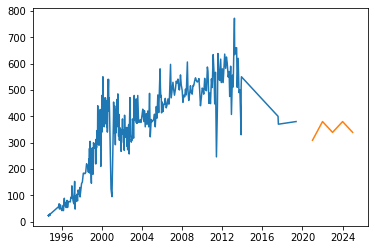

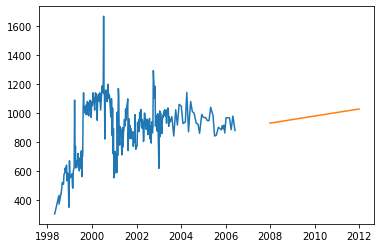

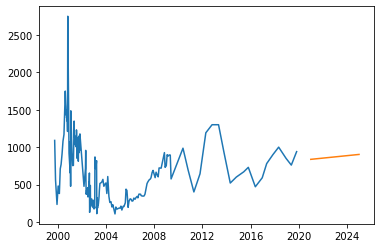

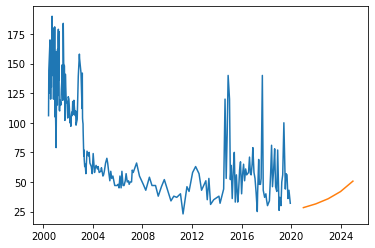

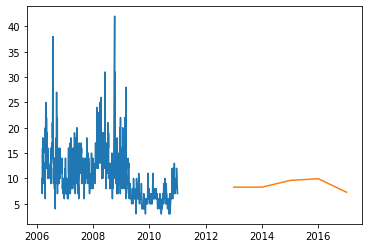

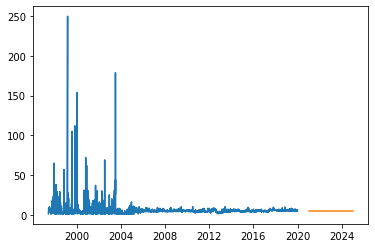

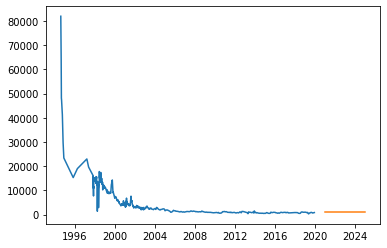

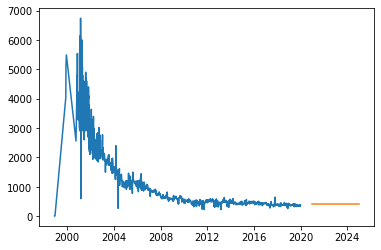

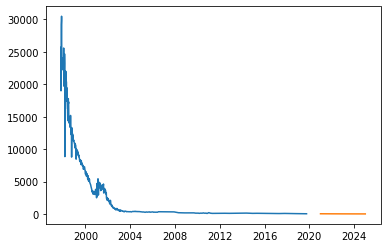

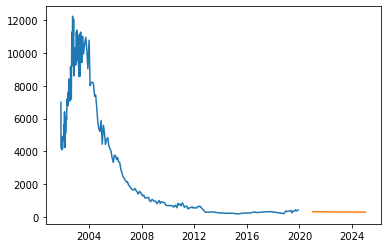

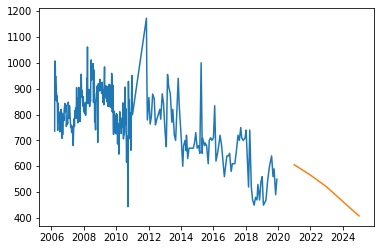

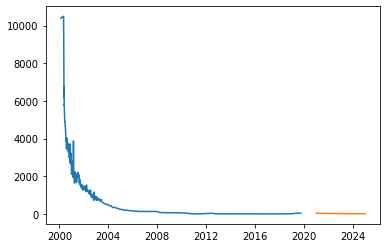

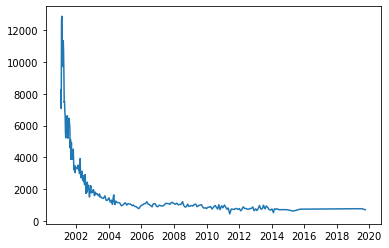

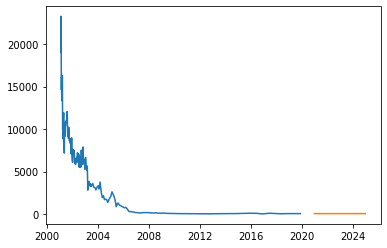

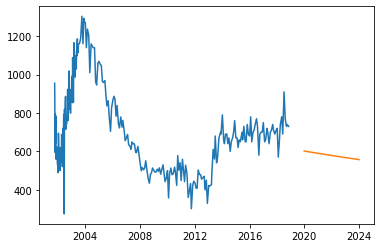

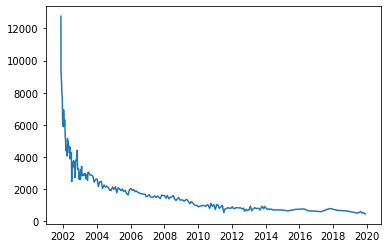

In [5]:
from autots import AutoTS
IS_DEBUG = False
grouped = di_time.groupby('Well Name')
n_rows = 1
count = 0
for name, group in grouped:
    # if count >= n_rows:
    #     break
    if len(group) < 200:
        continue

    group['Date'] = pd.to_datetime(group['ds'])
    group.set_index('Date', inplace=True)
    mod = AutoTS(forecast_length=5, frequency='Y',  ensemble='simple', no_negatives=True, min_allowed_train_percent = 0.2)
    mod = mod.fit(group, date_col='ds', value_col='y', id_col=None)
    print(mod)
    prediction = mod.predict()
    forecast = prediction.forecast
    model_results = mod.results()
    validation = mod.results("validation")
    #Forecast
    print(forecast)
    print("----------------")
    print(type(forecast))
    plt.plot(group.y,  label='a')
    plt.plot(forecast,  label='b')
    plt.show()
    #Validation Results
    print(validation)
    count+=1
